### Zillow Data

In [33]:
import pandas as pd
import numpy as np
import os
from plotnine import *
import scipy.stats as stats 
import warnings
warnings.filterwarnings("ignore")

In [35]:
print(os.getcwd())

/Users/speedeonloaner/Documents/Georgetown_Fall_2024/data_science_1/final_project/PPOL_5203_FinalProject/files/visualizations


In [39]:
##import housing data
housing_data = pd.read_csv("../../data/zillow/zillow_housing_neighborhood_dc.csv", encoding='utf-8')

In [41]:
housing_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/00,...,1/31/24,2/29/24,3/31/24,4/30/24,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24
0,121697,351,Columbia Heights,neighborhood,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,128365.922980,...,644170.047983,644019.064424,644743.689652,645270.309480,643357.881900,638786.079529,634370.181189,630870.528000,630434.535100,630304.591840
1,121685,387,Capitol Hill,neighborhood,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,209056.189265,...,913032.444616,910925.961300,910974.620300,911809.044445,910670.844642,906407.478126,902717.546268,900470.681300,902069.720797,903311.527014
2,121774,740,Petworth,neighborhood,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,141216.817840,...,679801.120333,678476.087043,679018.369920,679949.420919,679388.155413,675121.882485,669955.606700,663863.046458,661105.866279,659101.136712
3,121668,816,Adams Morgan,neighborhood,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,167995.626724,...,581187.407590,581224.931615,582268.766564,583166.123988,583306.066414,581452.281209,579612.351904,578123.410176,579435.486200,581161.059991
4,403481,890,Sixteenth Street Heights,neighborhood,DC,DC,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",District of Columbia,164864.732884,...,771301.547100,770192.858789,770981.797187,773258.812468,774139.984599,771304.847277,767026.588197,762298.012441,761328.329915,760720.622547


In [43]:
neighborhoods = [
    'Adams Morgan', 'American University Park', 'Anacostia', 'Barnaby Woods', 
    'Capitol Hill', 'Columbia Heights', 'Cleveland Park', 'Dupont', 
    'Foggy Bottom', 'Friendship Heights', 'Georgetown', 'Glover Park', 
    'H Street', 'Logan Circle', 'Mount Pleasant', 'Navy Yard', 
    'NoMa', 'Petworth', 'Shaw', 'Southwest Waterfront', 'Takoma', 
    'Tenleytown', 'The Palisades', 'U Street', 'West End', 'Woodley Park'
]

query_string = ' or '.join([f'RegionName == "{neighborhood}"' for neighborhood in neighborhoods])

In [45]:
housing_data_filtered =  (
    housing_data.filter(['RegionName','State','City', '1/31/21', '2/28/21', '3/31/21', '4/30/21', '5/31/21', '6/30/21',
                        '7/31/21', '8/31/21', '9/30/21', '10/31/21', '11/30/21', '12/31/21', '1/31/22', '2/28/22', '3/31/22', 
                         '4/30/22', '5/31/22', '6/30/22', '7/31/22', '8/31/22', '9/30/22', '10/31/22', '11/30/22', '12/31/22', '1/31/23', 
                         '2/28/23', '3/31/23', '4/30/23', '5/31/23', '6/30/23', '7/31/23', '8/31/23', '9/30/23', '10/31/23', '11/30/23', 
                         '12/31/23', '1/31/24', '2/29/24', '3/31/24', '4/30/24', '5/31/24', '6/30/24', '7/31/24', '8/31/24', '9/30/24', 
                         '10/31/24']).melt(id_vars=['RegionName', 'State', 'City'], var_name='EndMonth', value_name='MedianHomeValue').query(query_string)
                         )

In [47]:
housing_data_filtered.shape

(1058, 5)

In [49]:
housing_data_filtered_na = housing_data_filtered[~housing_data_filtered['MedianHomeValue'].isna()]
housing_data_filtered_na['EndMonth'] = pd.to_datetime(housing_data_filtered_na['EndMonth'])
housing_data_filtered_na.shape

(1045, 5)

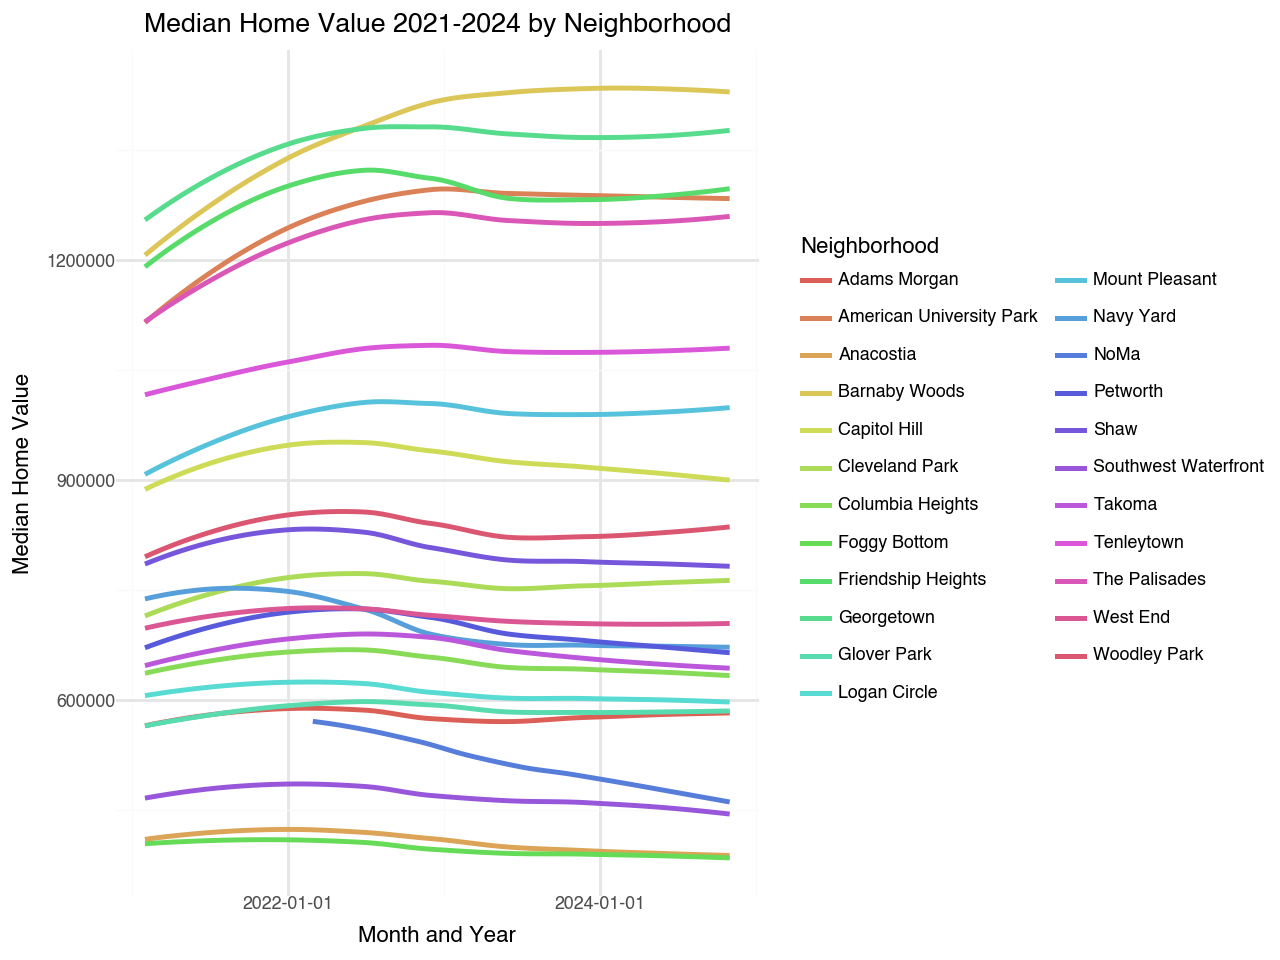

In [99]:
# step 1: data
(ggplot(data=housing_data_filtered_na) + 

# step 2: geom
 geom_smooth(

# step 3: aesthethics as variable
     aes(x="EndMonth", y="MedianHomeValue", color="RegionName"), method='loess', se=False) +

    theme_minimal(base_size=8) + 
    #theme(legend_position='none') + 


# step labels: edit the labels of the graph
labs(x="Month and Year", y="Median Home Value", title="Median Home Value 2021-2024 by Neighborhood", color="Neighborhood"))
 

In [53]:
##import rental data
rental_data = pd.read_csv("../../data/zillow/zillow_rental_value_zipcode.csv", encoding='utf-8')

In [55]:
rental_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2015-01-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,1555.281324,...,1935.568172,1957.522708,1970.900993,1994.472104,1998.255881,2012.374405,2015.978947,2025.530011,2013.823222,2004.028168
1,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,1317.214258,...,1886.237912,1900.746947,1910.295502,1920.966571,1917.565855,1917.953861,1930.319705,1940.466798,1917.997934,1901.639354
2,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2495.949662,2451.786276,2696.150778,2627.583333
3,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,1267.825951,...,1837.851190,1844.055148,1846.257335,1870.653160,1883.202282,1891.376573,1888.020245,1886.061153,1886.948068,1899.321711
4,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,NaN,...,1491.971429,1493.203612,1488.485006,1485.998879,1501.323433,1518.178964,1530.310869,1521.410962,1513.762609,1497.875458


In [79]:
rental_data_filter = (rental_data.filter(['RegionName','State','City', '2021-01-31', '2021-02-28', '2021-03-31', 
                                          '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', 
                                          '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', 
                                          '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', 
                                          '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', 
                                          '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', 
                                          '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
                                          '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30', 
                                          '2021-07-31', '2021-08-31', '2024-09-30', '2024-10-31']).melt(id_vars=['RegionName', 'State', 'City'], var_name='EndMonth', value_name='MedianRentalPrice').query(
    'State == "DC"'))

In [81]:
rental_data_filter.head()

,RegionName,State,City,EndMonth,MedianRentalPrice
166,20002,DC,Washington,2021-01-31,2007.251920
266,20011,DC,Washington,2021-01-31,1854.492606
334,20019,DC,Washington,2021-01-31,1658.095261
622,20020,DC,Washington,2021-01-31,1517.597454
834,20009,DC,Washington,2021-01-31,2206.613900


In [89]:
rental_data_filter_na = rental_data_filter[~rental_data_filter['MedianRentalPrice'].isna()]
rental_data_filter_na['EndMonth'] = pd.to_datetime(rental_data_filter['EndMonth'])
rental_data_filter_na['RegionName'] = rental_data_filter_na['RegionName'].astype('category')
rental_data_filter_na.shape

(873, 5)

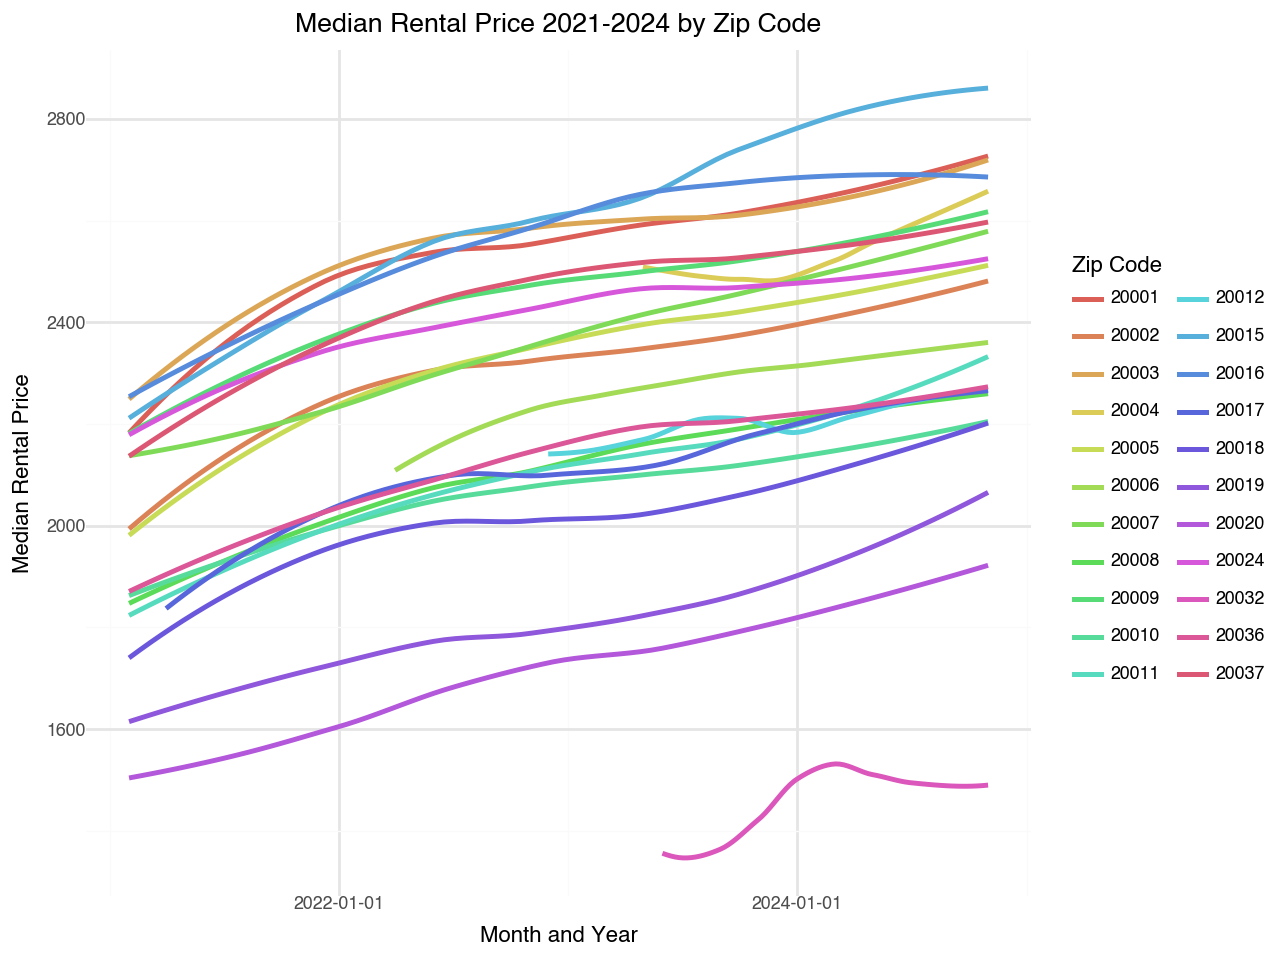

In [101]:
# step 1: data
(ggplot(data=rental_data_filter_na) + 

# step 2: geom
 geom_smooth(

# step 3: aesthethics as variable
     aes(x="EndMonth", y="MedianRentalPrice", color="RegionName"), method='loess', se=False) +

    theme_minimal(base_size=8) + 
    #theme(legend_position='none') + 


# step labels: edit the labels of the graph
labs(x="Month and Year", y="Median Rental Price", title="Median Rental Price 2021-2024 by Zip Code", color="Zip Code"))